<a href="https://colab.research.google.com/github/KLN-TBN/Notebooks/blob/main/DeepNeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep neural networks**

In this notebook, we'll experiment with feeding one neural network into another as in figure 4.1 from the book.

In [ ]:
# Imports math library
import numpy as np
# Imports plotting library
import matplotlib.pyplot as plt

In [ ]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [ ]:
# Define a shallow neural network with, one input, one output, and three hidden units
def shallow_1_1_3(x, activation_fn, phi_0,phi_1,phi_2,phi_3, theta_10, theta_11, theta_20, theta_21, theta_30, theta_31):
  # Initial lines
  pre_1 = theta_10 + theta_11 * x
  pre_2 = theta_20 + theta_21 * x
  pre_3 = theta_30 + theta_31 * x
  # Activation functions
  act_1 = activation_fn(pre_1)
  act_2 = activation_fn(pre_2)
  act_3 = activation_fn(pre_3)
  # Weight activations
  w_act_1 = phi_1 * act_1
  w_act_2 = phi_2 * act_2
  w_act_3 = phi_3 * act_3
  # Combine weighted activation and add y offset
  y = phi_0 + w_act_1 + w_act_2 + w_act_3
  # Return everything we have calculated
  return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

In [ ]:
# # Plot the shallow neural network.  We'll assume input in is range [-1,1] and output [-1,1]
# If the plot_all flag is set to true, then we'll plot all the intermediate stages as in Figure 3.3 
def plot_neural(x, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,act_1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,act_2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,act_3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_act_1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_act_2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_act_3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([-1,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(1.0)
      ax[2,plot_y].set_xlabel('Input, $x$');
    plt.show()

  fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input'); ax.set_ylabel('Output')
  ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
  ax.set_aspect(1.0)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

Let's define two networks.  We'll put the prefixes n1_ and n2_ before all the variables to make it clear which network is which.  We'll just consider the inputs and outputs over the range [-1,1].  If you set the "plot_all" flat to True,  you can see the details of how they were created.

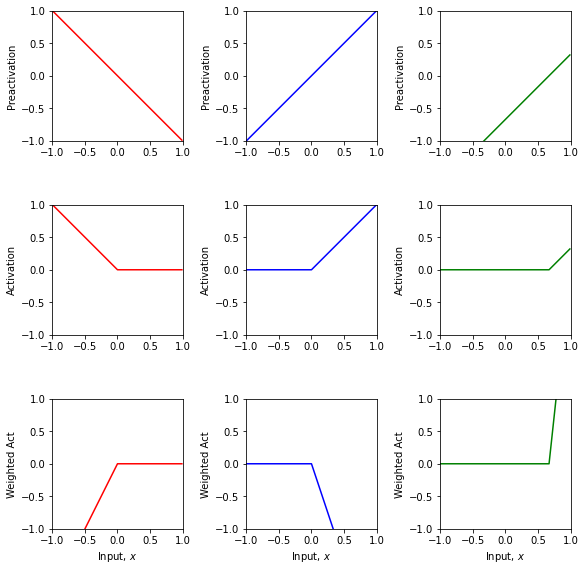

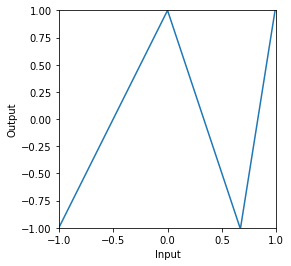

In [ ]:
# Now lets define some parameters and run the first neural network
n1_theta_10 = 0.0   ; n1_theta_11 = -1.0
n1_theta_20 = 0     ; n1_theta_21 = 1.0
n1_theta_30 = -0.67 ; n1_theta_31 =  1.0
n1_phi_0 = 1.0; n1_phi_1 = -2.0; n1_phi_2 = -3.0; n1_phi_3 = 9.3

# Define a range of input values
n1_in = np.arange(-1,1,0.01)

# We run the neural network for each of these input values
n1_out, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(n1_in, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
# And then plot it
plot_neural(n1_in, n1_out, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

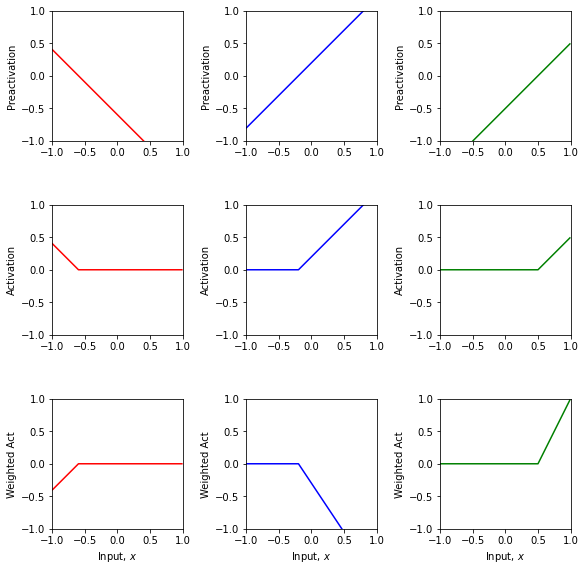

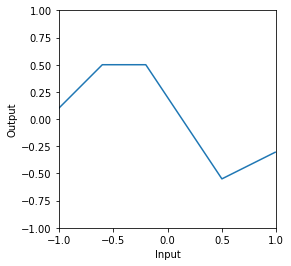

In [ ]:
# Now lets define some parameters and run the second neural network
n2_theta_10 =  -0.6 ; n2_theta_11 = -1.0
n2_theta_20 =  0.2  ; n2_theta_21 = 1.0
n2_theta_30 =  -0.5  ; n2_theta_31 =  1.0
n2_phi_0 = 0.5; n2_phi_1 = -1.0; n2_phi_2 = -1.5; n2_phi_3 = 2.0

# Define a range of input values
n2_in = np.arange(-1,1,0.01)

# We run the neural network for each of these input values
n2_out, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = \
    shallow_1_1_3(n2_in, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# And then plot it
plot_neural(n2_in, n2_out, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3, plot_all=True)

Now we'll consider feeding output of the first network into the second one.

In [ ]:
# # Plot two shallow neural networks and the composition of the two   
def plot_neural_two_components(x_in, net1_out, net2_out, net12_out=None):

  # Plot the two networks separately
  fig, ax = plt.subplots(1,2)
  fig.set_size_inches(8.5, 8.5)
  fig.tight_layout(pad=3.0)
  ax[0].plot(x_in, net1_out,'r-')
  ax[0].set_xlabel('Net 1 input'); ax[0].set_ylabel('Net 1 output')
  ax[0].set_xlim([-1,1]);ax[0].set_ylim([-1,1])
  ax[0].set_aspect(1.0)
  ax[1].plot(x_in, net2_out,'b-')
  ax[1].set_xlabel('Net 2 input'); ax[1].set_ylabel('Net 2 output')
  ax[1].set_xlim([-1,1]);ax[1].set_ylim([-1,1])
  ax[1].set_aspect(1.0)
  plt.show()

  if net12_out is not None:
    # Plot their composition
    fig, ax = plt.subplots()
    ax.plot(x_in ,net12_out,'g-')
    ax.set_xlabel('Net 1 Input'); ax.set_ylabel('Net 2 Output')
    ax.set_xlim([-1,1]);ax.set_ylim([-1,1])
    ax.set_aspect(1.0)
    plt.show()

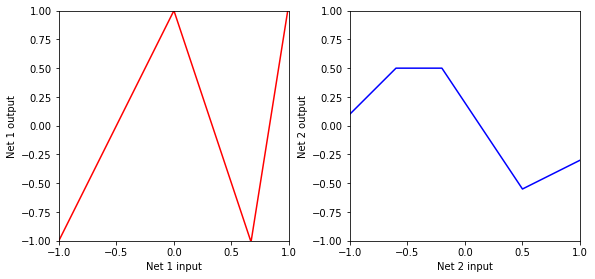

In [ ]:
# Display the two inputs
x = np.arange(-1,1,0.001)
# We run the first  and second neural networks for each of these input values
net1_out, *_ = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out, *_ = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plot both graphs
plot_neural_two_components(x, net1_out, net2_out)

In [ ]:
# TODO 
# Take a piece of paper and draw what you think will happen when we feed the 
# output of the first network into the second one.  Draw the relationship between
# the input of the first network and the output of the second one.

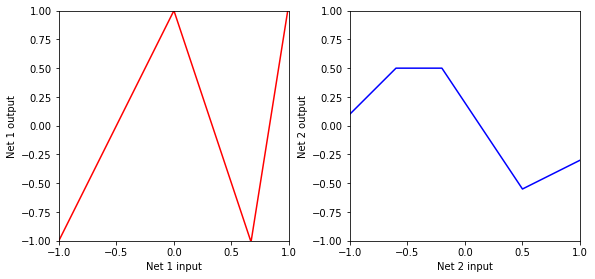

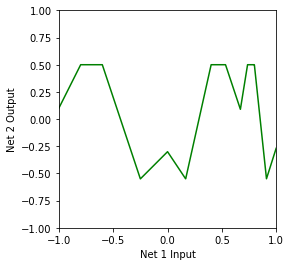

In [ ]:
# Now let's see if your predictions were right 

# TODO feed the output of first network into second network (replace this line)
net12_out, *_ = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
# Plot all three graphs
plot_neural_two_components(x, net1_out, net2_out, net12_out)

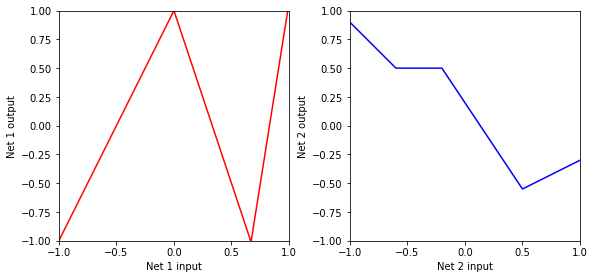

In [ ]:
# Now we'll change things a up a bit.  What happens if we change the second network? (note the *-1 change)
net1_out, *_ = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out, *_ = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [ ]:
# TODO 
# Take a piece of paper and draw what you think will happen when we feed the 
# output of the first network into the second one now that we have changed it.  Draw the relationship between
# the input of the first network and the output of the second one.

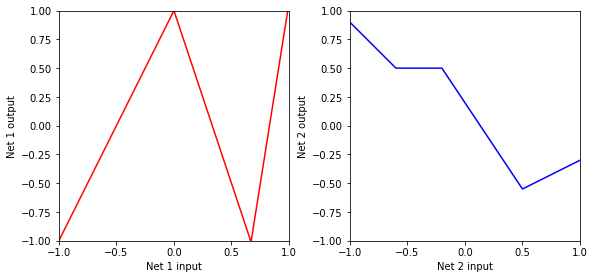

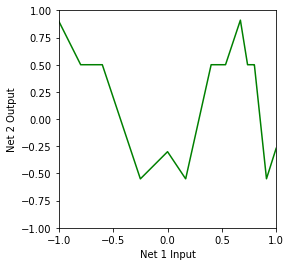

In [ ]:
# When you have a prediction, run this code to see if you were right
net12_out, *_ = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1*-1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

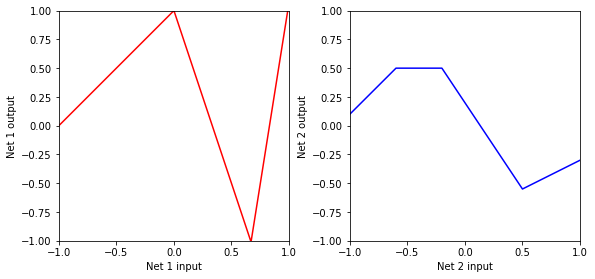

In [ ]:
# Let's change things again.  What happens if we change the firsrt network? (note the changes)
net1_out, *_ = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1*0.5, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out, *_ = shallow_1_1_3(x, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out)

In [ ]:
# TODO 
# Take a piece of paper and draw what you think will happen when we feed the 
# output of the first network now we have changed it into the original second network.  Draw the relationship between
# the input of the first network and the output of the second one.

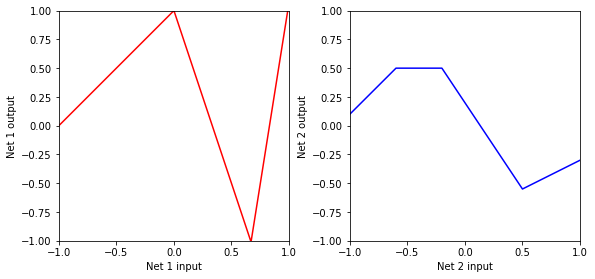

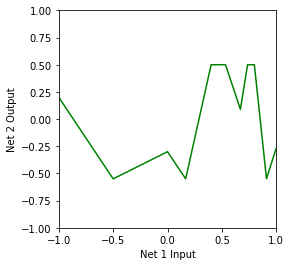

In [ ]:
# When you have a prediction, run this code to see if you were right
net12_out, *_ = shallow_1_1_3(net1_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net1_out, net2_out, net12_out)

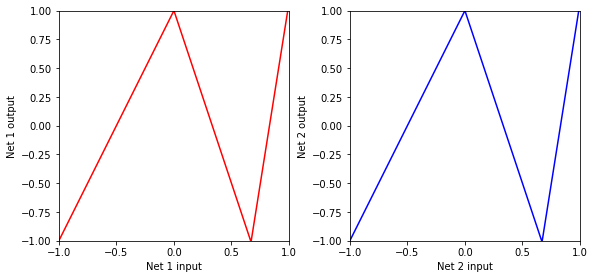

In [ ]:
# Let's change things again.  What happens if the first network and second networks are the same?
net1_out, *_ = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
net2_out_new, *_ = shallow_1_1_3(x, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new)

In [ ]:
# TODO 
# Take a piece of paper and draw what you think will happen when we feed the 
# output of the first network into the original second network.  Draw the relationship between
# the input of the first network and the output of the second one.

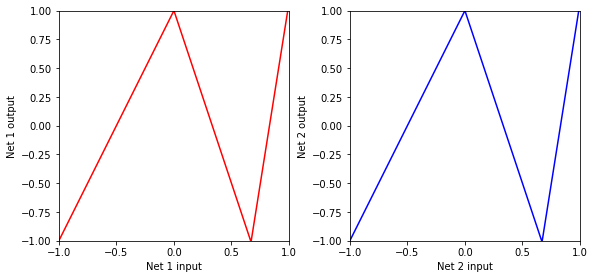

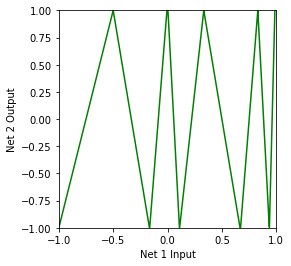

In [ ]:
# When you have a prediction, run this code to see if you were right
net12_out, *_ = shallow_1_1_3(net1_out, ReLU, n1_phi_0, n1_phi_1, n1_phi_2, n1_phi_3, n1_theta_10, n1_theta_11, n1_theta_20, n1_theta_21, n1_theta_30, n1_theta_31)
plot_neural_two_components(x, net1_out, net2_out_new, net12_out)

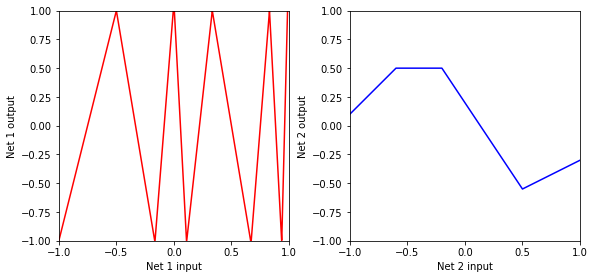

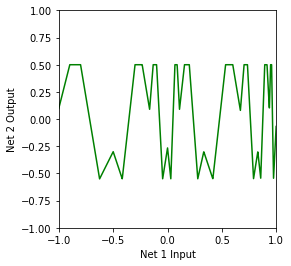

In [ ]:
# TODO 
# Contemplate what you think will happen when we feed the 
# output of the original first network into a second copy of the original first network, and then 
# the output of that into the original second network (so now we have a three layer network)
# How many total linear regions will we have in the output?
#Joints: 9*3+8 Linear regions: 4*9=36
net123_out, *_ = shallow_1_1_3(net12_out, ReLU, n2_phi_0, n2_phi_1, n2_phi_2, n2_phi_3, n2_theta_10, n2_theta_11, n2_theta_20, n2_theta_21, n2_theta_30, n2_theta_31)
plot_neural_two_components(x, net12_out, net2_out, net123_out)

In [ ]:
# TO DO
# How many linear regions would there be if we ran N copies of the first network, feeding the result of the first 
# into the second, the second into the third and so on, and then passed the result into the original second
# network (blue curve above)
#Linear regions: (3^N)*4

# Take away conclusions:  with very few parameters, we can make A LOT of linear regions, but
# they depend on one another in complex ways that quickly become to difficult to understand intuitively.